In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score

from sklearn.preprocessing import StandardScaler


plt.style.use('fivethirtyeight')


# Read Data

In [2]:
data = pd.read_csv('data\diabetes.csv')

# Eplore Data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.duplicated().sum()

0

# Analyze data

<Axes: >

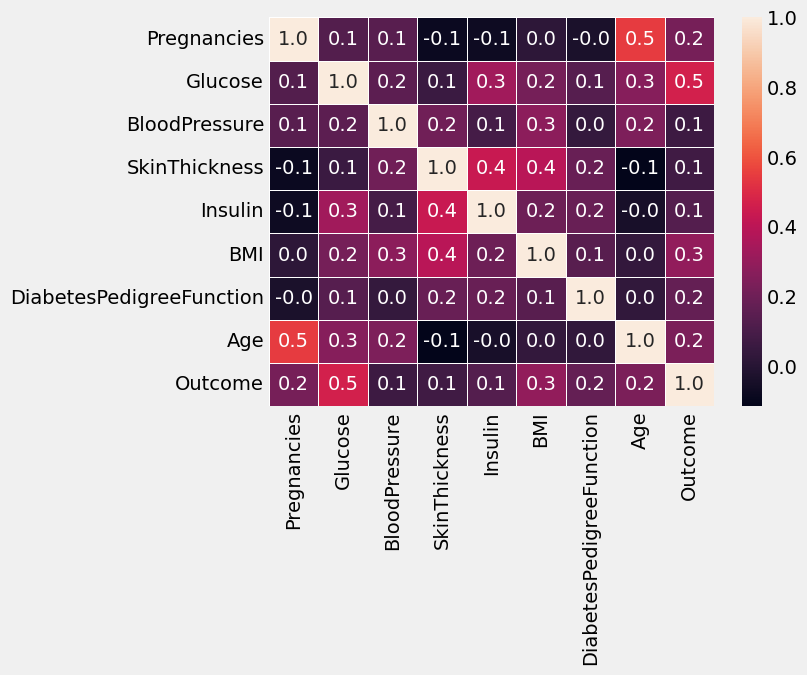

In [7]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidths=.5)

Text(0.5, 1.0, 'count of diabetes')

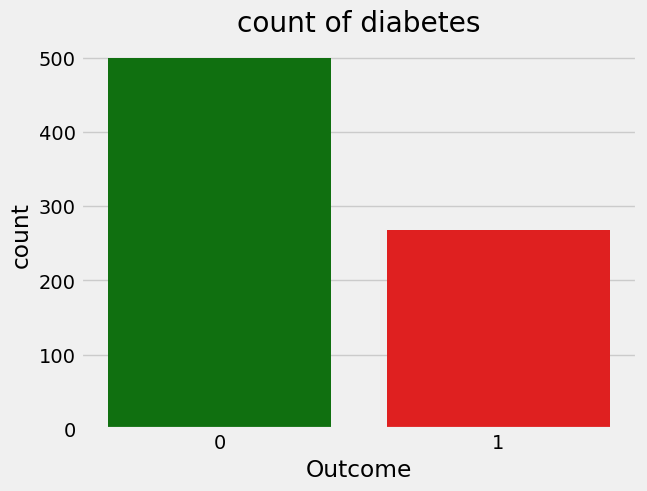

In [8]:
sns.countplot(x='Outcome',data=data,palette=['g','r'],)
plt.title('count of diabetes')

C:\Users\Elkady\AppData\Local\Temp\ipykernel_9256\2924063330.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pregnancies'])


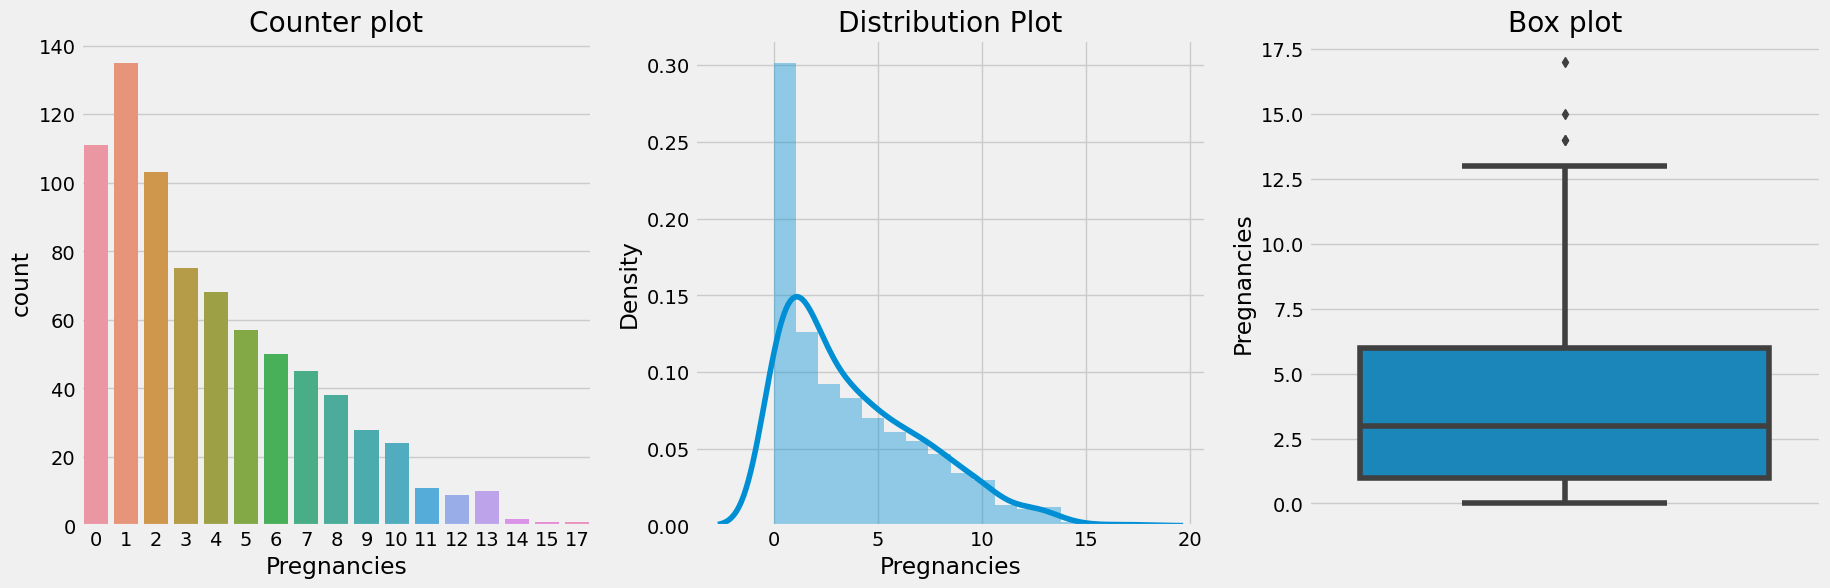

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x = 'Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y=data['Pregnancies'])

plt.show()

<Axes: >

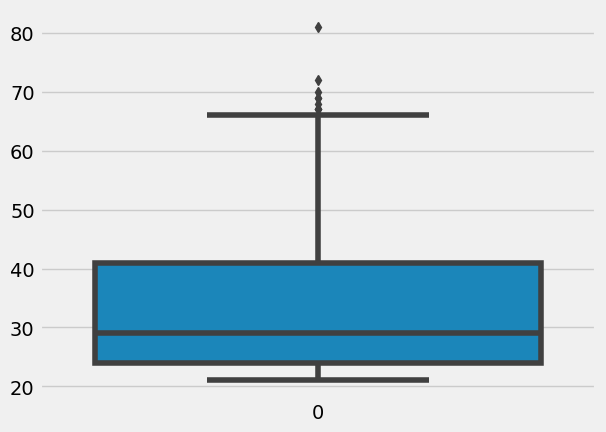

In [10]:
sns.boxplot(data.Age)

# Create_model

In [18]:
x = data.drop('Outcome',axis=1)
y = data.Outcome

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
models = [GradientBoostingClassifier(), LogisticRegression(), SVC(), RandomForestClassifier(n_estimators=100)]
Alogoriths = ['GradientBoostingClassifier','LogisticRegression','SVC','RandomForestClassifier']
accuracies = []
recalls = []
f1_scores = []

In [93]:
def Evaluate_Model(models, x_train, y_train, x_test, y_test):
    for model in models:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        accuracy = accuracy_score(pred, y_test)
        accuracies.append(accuracy)
        f1 = f1_score(pred, y_test)
        f1_scores.append(f1)
        recall = recall_score(pred, y_test)
        recalls.append(recall)
        confusion = confusion_matrix(pred, y_test)
        
        # Create a new figure for each heatmap
        plt.figure(figsize=(6, 4))
        heat_map = sns.heatmap(confusion, annot=True, fmt="d")
        
        # Set a title for the heatmap
        plt.title(f"Confusion Matrix - {type(model).__name__}")
        
        # Display the heatmap
        plt.show()
        print(classification_report(y_test, pred))
        print('accuracy is: ', accuracy, 'recall is: ', recall, 'f1_score is:', f1)

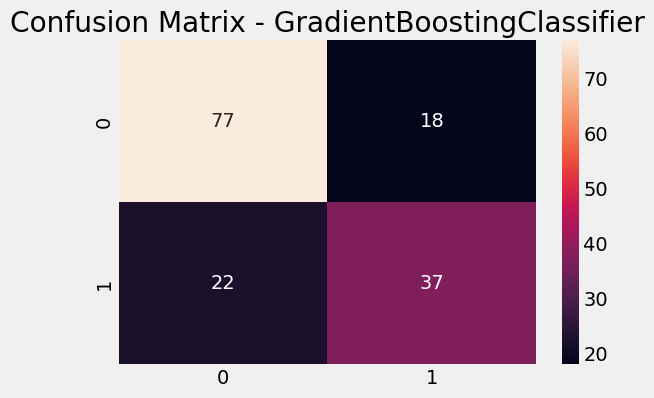

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

accuracy is:  0.7402597402597403 recall is:  0.6271186440677966 f1_score is: 0.6491228070175439


C:\Users\Elkady\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


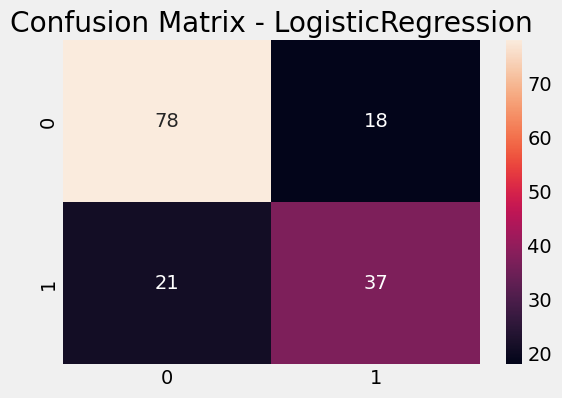

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

accuracy is:  0.7467532467532467 recall is:  0.6379310344827587 f1_score is: 0.6548672566371682


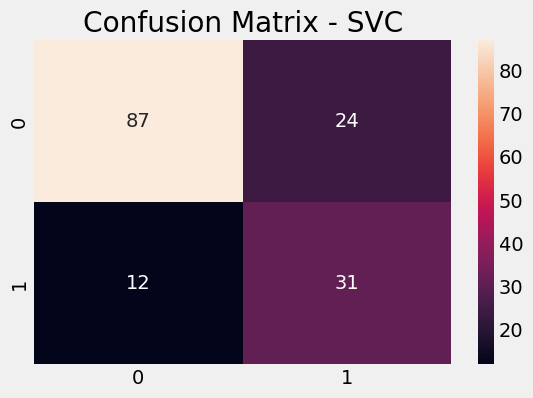

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

accuracy is:  0.7662337662337663 recall is:  0.7209302325581395 f1_score is: 0.6326530612244898


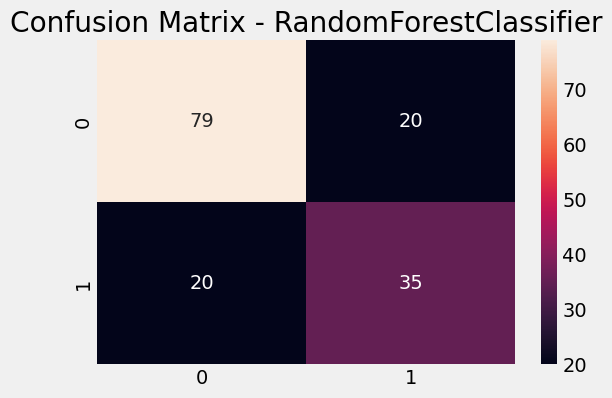

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

accuracy is:  0.7402597402597403 recall is:  0.6363636363636364 f1_score is: 0.6363636363636364


In [94]:
Evaluate_Model(models,x_train,y_train,x_test,y_test)

In [95]:
final_result = pd.DataFrame({'Algorithm':Alogoriths,'Accuracy':accuracies,'Recall':recalls,'F1_score':f1_scores})

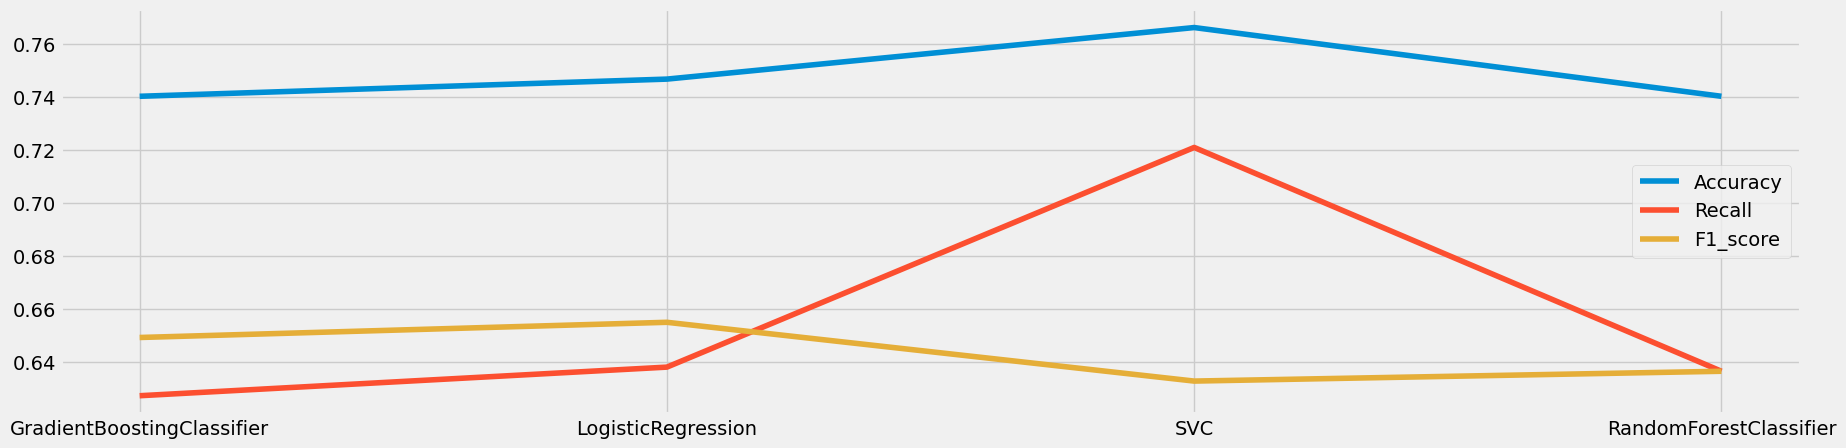

In [96]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithm,accuracies,label='Accuracy')
plt.plot(final_result.Algorithm,recalls,label='Recall')
plt.plot(final_result.Algorithm,f1_scores,label='F1_score')
plt.legend()


plt.show()

# save and load model

In [103]:
#Save the Model
import pickle

pickle.dump(model,open('Diabetes_predicting,pkl','wb'))

NameError: name 'model' is not defined

In [102]:
#load the Model

pickle.load(open('Diabetes_predicting,pkl','rb'))

[GradientBoostingClassifier(),
 LogisticRegression(),
 SVC(),
 RandomForestClassifier()]